In [14]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import cv2 as cv
import math, os, sys, copy
%matplotlib inline

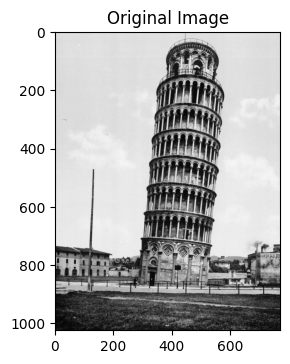

In [15]:
image = cv.imread('pisa_tower.jpg', 0)
plt.subplot(121); plt.imshow(image, cmap = "grey"); plt.title("Original Image")
plt.show()

In [36]:
convolution = np.array([[-0.25, -0.50, -25], [0, 0, 0], [0.25, 0.50, 0.25]])

rows = image.shape[0]
cols = image.shape[1]

convolve_image = np.zeros_like(image)

def convolve(image):

    for i in range(rows):
        for j in range(cols):
            diff_x = convolution.shape[0] // 2
            diff_y = convolution.shape[1] // 2

            if(i == 0 and j == 0):
                convolve_image[i][j] = convolution[diff_x][diff_y] * image[i][j] + convolution[diff_x+1][diff_y+1] * image[i+1][j+1] + convolution[diff_x+1][diff_y] * image[i+1][j] + convolution[diff_x][diff_y+1] * image[i][j+1]
            elif(i == rows-1 and j == cols-1):
                convolve_image[i][j] = np.sum(convolution[diff_x-1:diff_x+1, diff_y-1:diff_y+1] * image[i-1:, j-1:])
            elif(i == rows-1 and j == 0):
                convolve_image[i][j] = np.sum(convolution[diff_x-1:, :2] * image[i-1, :2])
            elif(i == 0 and j == cols - 1):
                convolve_image[i][j] = np.sum(convolution[:2, diff_y-1:diff_y+1] * image[:2, j-1:j+1])
            elif(i == 0 and j != cols-1):
                convolve_image[i][j] = np.sum(convolution[diff_x:diff_x+2, diff_y-1:diff_y+2] * image[i:i+2, j-1:j+2]).astype(np.uint8)
            elif(j == 0 and i != rows-1):
                convolve_image[i][j] = np.sum(convolution[diff_x-1:diff_x+2, diff_y:diff_y+2] * image[i-1:i+2, j:j+2]).astype(np.uint8)
            elif(i == rows -1 and j != cols-1):
                convolve_image[i][j] = np.sum(convolution[diff_x-1:, diff_y-1:diff_y+2] * image[i:, j-1:j+2]).astype(np.uint8)
            elif(j == cols-1 and i != rows-1):
                convolve_image[i][j] = np.sum(convolution[diff_x-1:diff_x+2, diff_y-1:diff_y+1] * image[i-1:i+2, j-1:j+1]).astype(np.uint8)
            else:
                convolve_image[i][j] = np.sum(convolution[diff_x-1:diff_x+2, diff_y-1:diff_y+2] * image[i-1:i+2, j-1:j+2])
    
    return convolve_image

convolve_image = convolve(image)


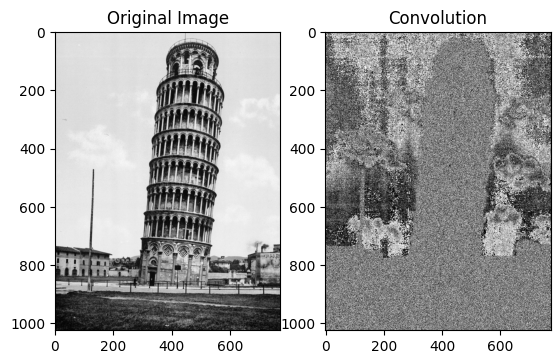

In [37]:
plt.subplot(121); plt.imshow(image, cmap = "grey"); plt.title("Original Image")
plt.subplot(122); plt.imshow(convolve_image, cmap = "grey"); plt.title("Convolution")
plt.show()